In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp,ttest_ind,ttest_rel
from scipy.stats import f_oneway
from scipy.stats import shapiro
from scipy.stats import levene
from scipy.stats import kruskal
from scipy.stats import chi2,chisquare,chi2_contingency
from scipy.stats import pearsonr,spearmanr
from statsmodels.graphics.gofplots import qqplot

In [4]:
df = pd.read_csv('/content/drive/MyDrive/dataset/bike_sharing.csv')
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [5]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
#check data,shape and data types of column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [7]:
#check null values
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [8]:
#check duplicated rows
df.duplicated().sum()

0

In [9]:
#statistical summary for analysis variable
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


Distribution of all columns

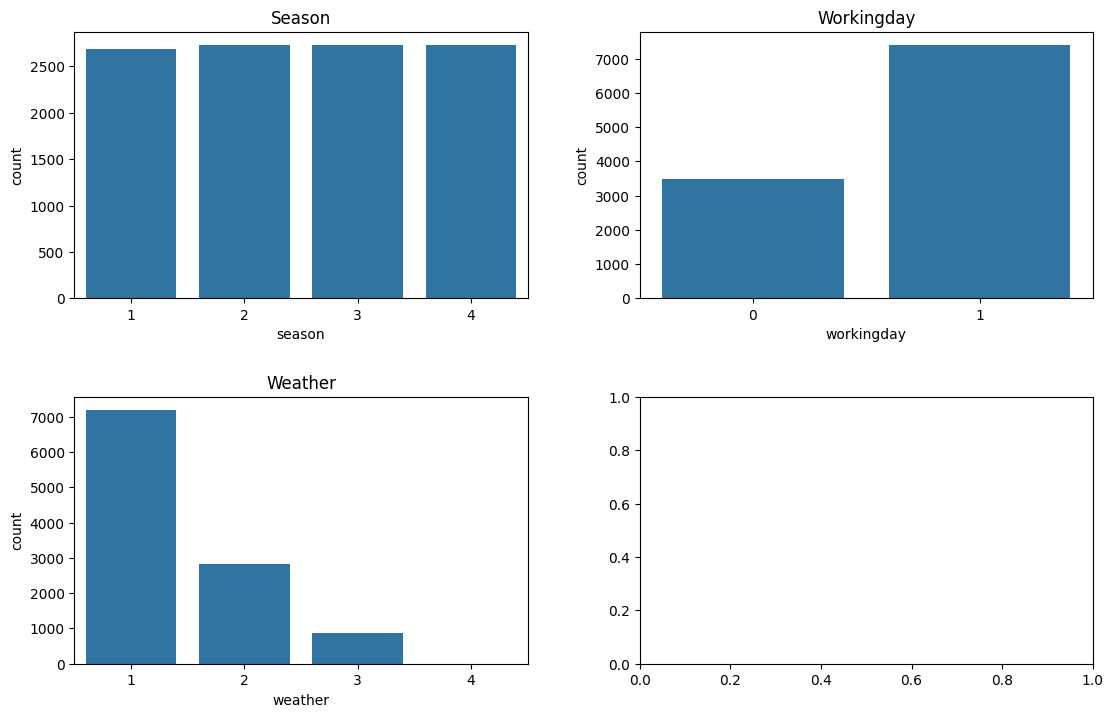

In [10]:
columns = ['season','workingday','weather']
fig, ax = plt.subplots(2,2,figsize=(12,8))
fig.tight_layout(pad=5.0)
i = 0;j= 0
for column in columns:
    plot_df = sns.countplot(data=df,x=column,ax=ax[i,j])
    plot_df.set_title(str.capitalize(column))
    j=j+1
    if j%2==0:i=i+1;j=0

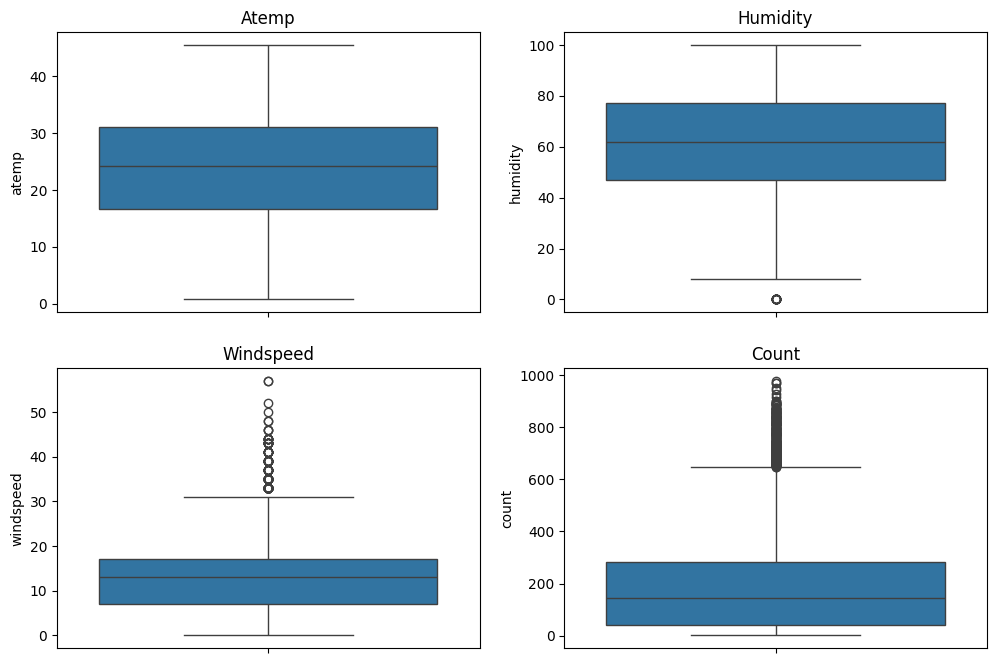

In [11]:
columns = ['atemp','humidity','windspeed','count']
fig, ax = plt.subplots(2,2,figsize=(12,8))
i = 0;j= 0
for column in columns:
    plot_df = sns.boxplot(data=df,y=column,ax=ax[i,j])
    plot_df.set_title(str.capitalize(column))
    j=j+1
    if j%2==0:i=i+1;j=0

Here, season colum is uniformly distributed. We got twice the workingday than holiday/weekend. Weather is mostly clear, sometimes we get mist or snowfall. But rarely a bad weather. Which is expected as people don't get out on bike on bad weather.
atemp, humidity has normal distribution. But windspeed and count seems to be right skewed with too many outliers. Let's drop the outliers rows.

In [12]:
Q1 = df['count'].quantile(0.25)
Q3 = df['count'].quantile(0.75)
IQR = Q3 - Q1
df=df[(df['count']>Q1 - (1.5*IQR)) & (df['count']<Q3 + (1.5*IQR))].copy()
df.shape

(10583, 12)

Correlation

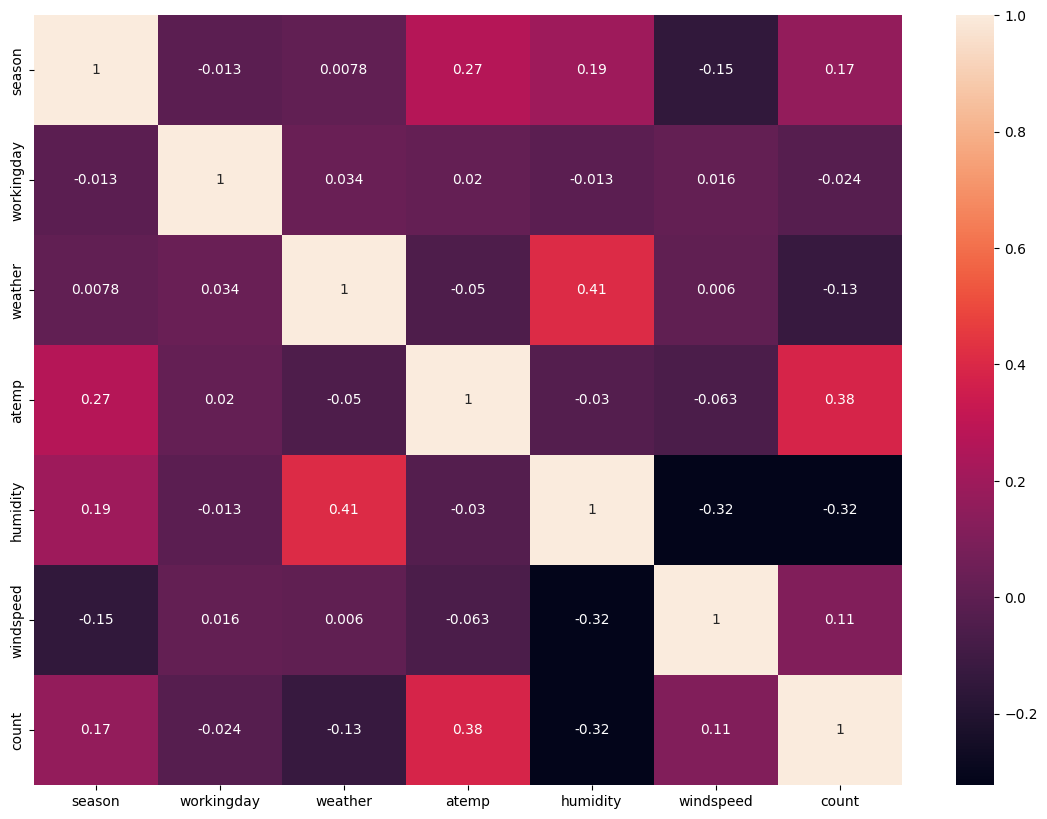

In [13]:
fig, ax = plt.subplots(figsize=(14,10))
df_corr = sns.heatmap(df.drop(columns=['holiday','casual','registered','temp']).corr(numeric_only=True), annot=True,ax=ax)

Here, count column seems to have positive correlation with atemp and and negative with humidity. Although they around only 30-40%. But we can see people go out with bike more when the temp is high and humidity is low. Seems expected.

Hypotheis Testing
1. Does working day has effect on number of electric cycles rented?

H0: Average number of bike rentals on the working day is same as the average number of bike rentals on the non-working day

Ha: Average number of bike rentals on the working day is greater than the average number of bike rentals on the non-working day

In [14]:
df['workingday'].value_counts()

workingday
1    7161
0    3422
Name: count, dtype: int64

In [15]:
df.groupby('workingday')['count'].mean()

workingday
0    180.965517
1    173.011591
Name: count, dtype: float64

In [16]:
working_day =df[df['workingday']==1]['count'].sample(3400)
non_working_day =df[df['workingday']==0]['count'].sample(3400)
t_stat,p_value=ttest_ind(working_day,non_working_day,alternative='greater')

In [17]:
alpha=0.05
print('alpha:',alpha)
print('p_value:',p_value)
if p_value > alpha:
  print('result:','reject the null hypothesis')
  print('avg no of bikes rented on working day is greater than on non working day')
else:
  print('result:','failed to reject null hypothesis')
  print('avg no of bikes rented on working day is same as on non working day')

alpha: 0.05
p_value: 0.9438076917455004
result: reject the null hypothesis
avg no of bikes rented on working day is greater than on non working day


Check the average rentals of each category to get an idea on to set up the hypothesis

Q2) Effect of season on bike rentals

Check the sample sizes and the means of sample for each category in the season

In [18]:
df['season'].value_counts()

season
1    2670
4    2664
2    2633
3    2616
Name: count, dtype: int64

In [19]:
df.groupby('season')['count'].mean()

season
1    112.795131
2    195.653627
3    210.484327
4    184.404655
Name: count, dtype: float64

<Axes: xlabel='count', ylabel='Density'>

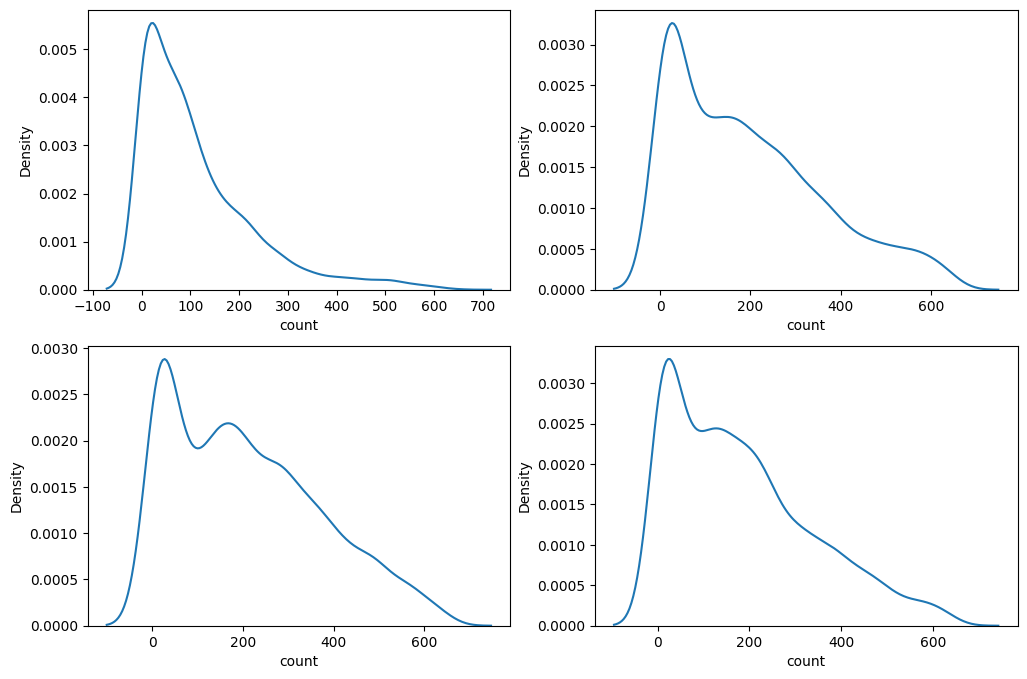

In [20]:
# 1: spring, 2: summer, 3: fall, 4: winter
spring = df.loc[df['season']==1,'count']
summer = df.loc[df['season']==2,'count']
fall = df.loc[df['season']==3,'count']
winter = df.loc[df['season']==4,'count']
fig, ax = plt.subplots(2,2,figsize=(12,8))
sns.kdeplot(spring,ax=ax[0,0])
sns.kdeplot(summer,ax=ax[0,1])
sns.kdeplot(fall,ax=ax[1,0])
sns.kdeplot(winter,ax=ax[1,1])

In [21]:
#Setup Null hypotheis
H0 = 'Average no of bikes rented is same for all seasons'
H1= 'Average no of bikes rented is different for atleast one season'

One-way ANOVA test:

To compare the means of 4 independent groups, the Anova test is selected.

Assumptions of Anova:
1. Data should follow a Gaussian distribution
2. Independent groups
3. Equal variance in all the groups



From the plots, it is clear that the data is not a normal distribution.
2. Independent groups — this condition is already satisfied since all seasons are independent of each other
3. Check if all groups have same variance: For this, levene test is used.

In [22]:
#test of equal variance
tstat,p_value=levene(spring,summer,fall,winter)
H0='Variance is same for all seasons'
Ha= 'Variance is not same for all seasons'
alpha=0.05
print('p_value:',p_value)
if p_value < alpha:
  print('Reject the null hypothesis:',Ha)
else:
  print('failed to Reject the null hypothesis:',H0)

p_value: 2.6643548968275643e-112
Reject the null hypothesis: Variance is not same for all seasons


From the output, it is clear that variance is not same for all seasons and third assumption failed.

This data is not suitable to perform a ANOVA test since the first and third assumptions are not met.

This is what can happen in business scenarios. Not every theory can be applied to the business problem. But there is a way for everything.
Since Anova is failed,

let’s try Kruskal test

In [23]:
#Kruskal Test
#Setup null and alternate hypothesis

H0='avg no. of bike rented is same for all seasons'
Ha= 'avg no. of bike is different in different seasons'
tstat,p_value=kruskal(spring,summer,fall,winter)
print('alpha:',alpha)
print('p_value:',p_value)
if p_value < alpha:
  print('Reject the null hypothesis:',Ha)
else:
  print('failed to Reject the null hypothesis:',H0)

alpha: 0.05
p_value: 6.376253250003707e-134
Reject the null hypothesis: avg no. of bike is different in different seasons


The averagenumber of rentals is different for different seasons.

Does weathers has effect on number of electric cycles rented?

H0: Weathers has No effect on number of electric cycles rented
H1: Weathers has effect on number of electric cycles rented

<ipython-input-24-c8a8b0f45f3a>:13: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(heavy_rain,ax=ax[1,1])


<Axes: xlabel='count', ylabel='Density'>

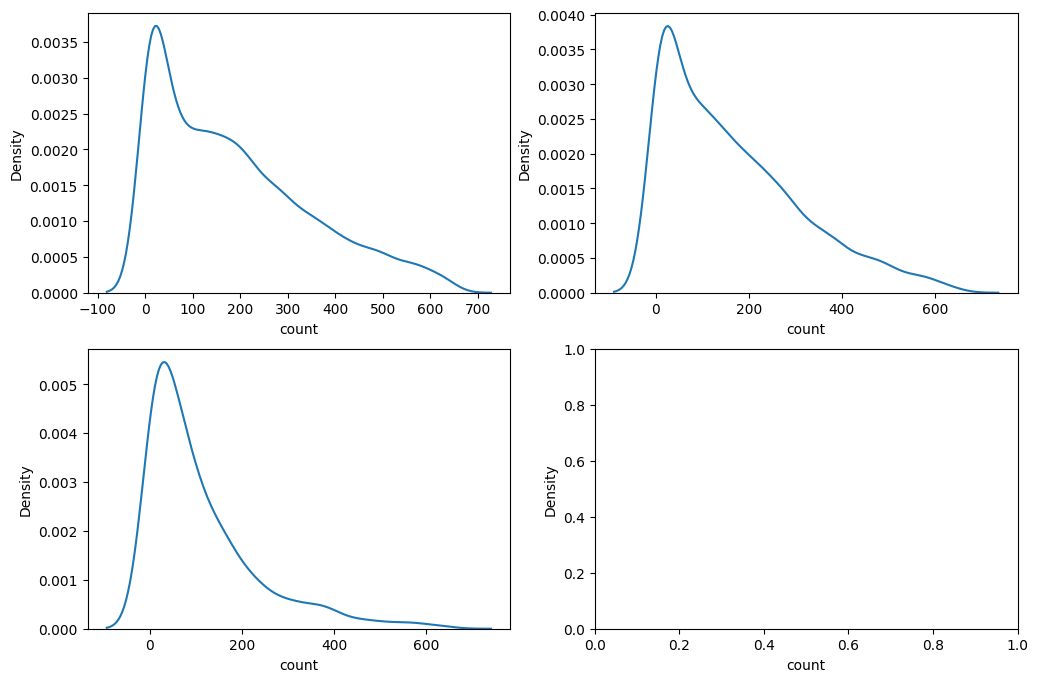

In [24]:
# 1: Clear, Few clouds, partly cloudy, partly cloudy
# 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered  clouds
# 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
clear = df.loc[df['weather']==1,'count']
mist = df.loc[df['weather']==2,'count']
light_rain = df.loc[df['weather']==3,'count']
heavy_rain = df.loc[df['weather']==4,'count']
fig, ax = plt.subplots(2,2,figsize=(12,8))
sns.kdeplot(clear,ax=ax[0,0])
sns.kdeplot(mist,ax=ax[0,1])
sns.kdeplot(light_rain,ax=ax[1,0])
sns.kdeplot(heavy_rain,ax=ax[1,1])

In [26]:
H0='Weathers has No effect on number of electric cycles rented'
Ha='Weathers has effect on number of electric cycles rented'
tstat,p_value=kruskal(clear,mist,light_rain,heavy_rain)
print('alpha:',alpha)
print('p_value:',p_value)
if p_value < alpha:
  print('Reject the null hypothesis:',Ha)
else:
  print('failed to Reject the null hypothesis:',H0)

alpha: 0.05
p_value: 2.7369378742733244e-40
Reject the null hypothesis: Weathers has effect on number of electric cycles rented


Here, P-value is 2.73e-4 which is way too smaller than alpha=.05. We can reject the null hypothesis and say that, Weather effects the number of riders.

([<matplotlib.axis.XTick at 0x7c1f3330d4b0>,
 [Text(0, 0, 'clear'),
  Text(1, 0, 'mist'),
  Text(2, 0, 'light rain'),
  Text(3, 0, 'heavy rain')])

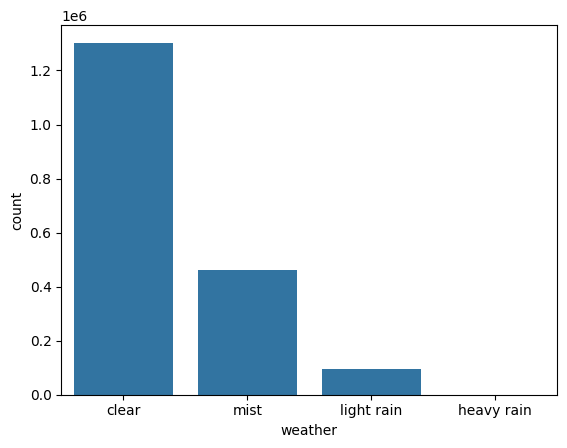

In [27]:
weather_grouped = pd.DataFrame(df.groupby('weather')['count'].sum())
sns.barplot(data=weather_grouped,x=weather_grouped.index,y='count')
plt.xticks(range(4),['clear','mist','light rain','heavy rain'])

 Q4) Is weather and season dependent?

Chi2_Contingency Test:
To check if there is a significant relationship between 2 categorical variables, chi square test of independence can be used.
Set up Null & Alternate hypothesis:

In [28]:
H0='Weather and Season are independent'
Ha='Weather and Season are dependent'


In [29]:
ws=pd.crosstab(df['weather'],df['season'])
ws

season,1,2,3,4
weather,,,,
1,1744,1720,1842,1656
2,714,690,579,787
3,211,223,195,221
4,1,0,0,0


calculate the p value and compare with alpha

In [30]:
#test of equal variance
alpha=0.05
p_value = chi2_contingency(ws).pvalue
print('alpha:',alpha)
print('p_value:',p_value)
if p_value < alpha:
  print('Reject the null hypothesis:',Ha)
else:
  print('failed to Reject the null hypothesis:',H0)

alpha: 0.05
p_value: 3.6550317439064896e-07
Reject the null hypothesis: Weather and Season are dependent


It appears that our intuition about the dependency between weather and season is statistically significant.

Conclusion:
T-test of independence: To determine if there is a significant difference bewteen 2 sample groups (higher or lower or not equal)

Result: There is no statistically significant difference on average number of rentals between working day and non-working day

ANOVA Test: To compare means of 3 or more groups to understand if at least one group mean is significantly different from the others.

Result: Failed to satisfy the assumptions of ANOVA test but got the approximate results using Kruskal test.

Chi-Square Test of Independence: To check if there is a significant relationship between 2 categorical variables

Result: Weather and Season are significantly dependent

Overall, the project provides valuable insights into the business case study of Yulu and to understand various factors such as working days, holidays, seasons, and weather on how they are impacting the demand for bike rentals using 3 different statistical tests.

**Recommendation**
In summer and fall seasons the company should have more bikes in stock to be rented because the demand of these season are higher as compared to other seasons.
With significance level of 0.05,working day has no effect on the number of bikes being rented
In very low humid days,company should have less bikes in the stock to be rented.
Whenever temperature is less than 10 or in very cold days,company should have less bikes.
whenever the windspeed is greater than 35 or in thunderstorms,comapny should have less bikes in stock to be rented.